In [1]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(111)

In [3]:
train_data_length = 1024
train_data = torch.zeros((train_data_length, 2))
train_data[:, 0] = 2 * math.pi * torch.rand(train_data_length)
train_data[:, 1] = torch.sin(train_data[:, 0])
train_labels = torch.zeros(train_data_length)
train_set = [
    (train_data[i], train_labels[i]) for i in range(train_data_length)
]

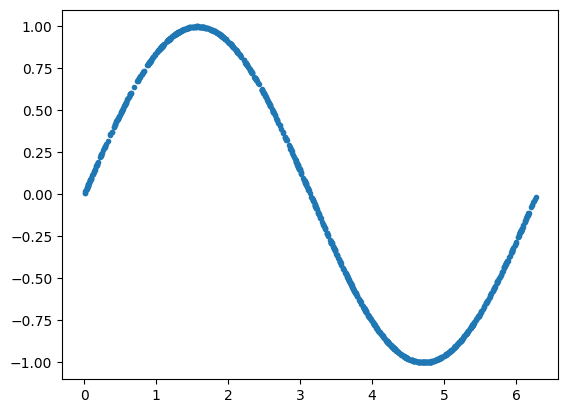

In [4]:
plt.plot(train_data[:, 0], train_data[:, 1], ".")

In [5]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

In [6]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        output = self.model(x)
        return output

In [7]:
discriminator = Discriminator()

In [8]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 2),
        )

    def forward(self, x):
        output = self.model(x)
        return output

generator = Generator()

In [9]:
lr = 0.001
num_epochs = 300
loss_function = nn.BCELoss()

In [10]:
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [28]:
loss = []

for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 2))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 2))

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()
        if (epoch%10==0):
            loss.append(loss_generator)

        print(f"Epoch: {epoch} Loss G.: {loss_generator}")

Epoch: 0 Loss G.: 0.298235148191452
Epoch: 0 Loss G.: 0.2689977288246155
Epoch: 0 Loss G.: 0.2618454098701477
Epoch: 0 Loss G.: 0.29721999168395996
Epoch: 0 Loss G.: 0.2973324656486511
Epoch: 0 Loss G.: 0.3064288794994354
Epoch: 0 Loss G.: 0.30019858479499817
Epoch: 0 Loss G.: 0.2544381320476532
Epoch: 0 Loss G.: 0.2923675775527954
Epoch: 0 Loss G.: 0.30521517992019653
Epoch: 0 Loss G.: 0.31312352418899536
Epoch: 0 Loss G.: 0.2711125612258911
Epoch: 0 Loss G.: 0.31967276334762573
Epoch: 0 Loss G.: 0.3082599639892578
Epoch: 0 Loss G.: 0.27989912033081055
Epoch: 0 Loss G.: 0.3476905822753906
Epoch: 0 Loss G.: 0.331216424703598
Epoch: 0 Loss G.: 0.2769913673400879
Epoch: 0 Loss G.: 0.3080386221408844
Epoch: 0 Loss G.: 0.2848096787929535
Epoch: 0 Loss G.: 0.25950494408607483
Epoch: 0 Loss G.: 0.27757325768470764
Epoch: 0 Loss G.: 0.2770199775695801
Epoch: 0 Loss G.: 0.3225098252296448
Epoch: 0 Loss G.: 0.33791694045066833
Epoch: 0 Loss G.: 0.28459852933883667
Epoch: 0 Loss G.: 0.2354332506

In [29]:
float(loss[0])

0.298235148191452

In [30]:
import numpy as np
import matplotlib.pyplot as plt

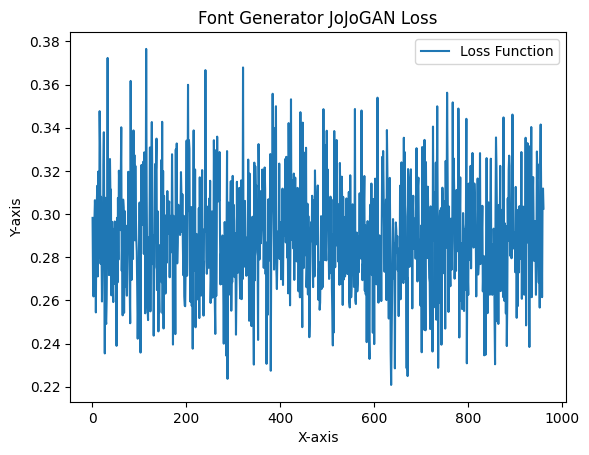

In [31]:
epochs = []
for i in range(len(loss)):
    loss[i] = float(loss[i])
    i+=1
    epochs.append(i)
    
plt.plot(np.array(epochs), np.array(loss), label='Loss Function')
# Adding legend, x and y labels, and title for the lines
plt.legend()
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Font Generator JoJoGAN Loss')

# to show the final graph
plt.show()


In [12]:
latent_space_samples = torch.randn(100, 2)
generated_samples = generator(latent_space_samples)

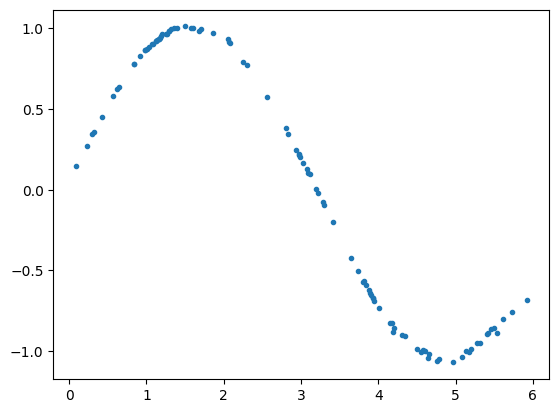

In [13]:
generated_samples = generated_samples.detach()
plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")